In [84]:
import matplotlib.pyplot as plt
import math as math
import random as random
import pylab as pylab
import numpy as np

In [85]:
Kb = 1.0
JJ = 1.0
mu = 1.0

In [86]:
def cold_start(L):
    U = [1.0 for k in range(L)]
    return U

In [87]:
U=(cold_start(9))
CU=U
U

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [88]:
def hot_start(L):
    HU=[]
    for i in range(9):
        HU.append(float(random.randint(0,1)))
        
    return HU

In [89]:
hot_start(9)
HU=hot_start(9)
HU

[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]

In [90]:
def matr(B,U):
    mu=1; JJ=1
    
    Z=np.zeros([9,9])
    '''for i in range(9):
        #Z[i][i]=(4*JJ)-(mu*float(B)*0.5)
        #Z[i][i]=(4*1)-(1*1*0.5)'''
    c= 4.0*1.0-(1.0*B*0.5)  
    Z[1][1]=c
    Z[2][2]=c
    Z[3][3]=c
    Z[4][4]=c
    Z[5][5]=c
    Z[6][6]=c
    Z[7][7]=c
    Z[0][0]=c
    
    Z[0][1]=-2*mu;
    Z[0][2]=-2*mu;
    Z[0][3]=-2*mu;
    Z[0][6]=-2*mu;
    Z[5][8]=-2*mu;
    Z[6][8]=-2*mu;
    Z[7][8]=-2*mu;
    Z[1][2]=-2*mu;
    Z[3][4]=-2*mu;
    Z[4][5]=-2*mu;
    Z[1][4]=-2*mu;
    Z[2][5]=-2*mu;
    Z[3][6]=-2*mu;
    Z[4][7]=-2*mu;
    Z[1][7]=-2*mu;
    Z[2][8]=-2*mu;
    Z[3][5]=-2*mu;
    Z[6][7]=-2*mu;
    
    return Z
    

In [91]:
matr(0,U)

array([[ 4., -2., -2., -2.,  0.,  0., -2.,  0.,  0.],
       [ 0.,  4., -2.,  0., -2.,  0.,  0., -2.,  0.],
       [ 0.,  0.,  4.,  0.,  0., -2.,  0.,  0., -2.],
       [ 0.,  0.,  0.,  4., -2., -2., -2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  4., -2.,  0., -2.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  4.,  0.,  0., -2.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  4., -2., -2.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4., -2.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [92]:
def Hamiltonian(B,U,printkey):
    Z=matr(B,U)
    UU= np.asarray(U) #for matrix multliplication
    Hmat=np.dot(Z,UU) 
    H=Hmat.sum()+9*B  
    if printkey==1:
        print(" state", U ,"has energy", H)
     
    return H

In [93]:
Hamiltonian(1.5,U,1) 

 state [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] has energy 3.5


3.5

In [94]:
Hamiltonian(5,cold_start(9),1)

 state [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] has energy 21.0


21.0

In [95]:
def magnetization(U):
    return np.array(U).sum()/float(len(U))

In [96]:
magnetization(HU)

0.4444444444444444

In [97]:
magnetization(cold_start(9))

1.0

In [98]:
 
def spinflipper(U,B,printkey):
    Uold=U
    Hold=Hamiltonian(B,U,printkey)
    a=random.randint(0, 8)
    r=1-U[a] # index
 
    U[a]=r
    if printkey==2: 
        print("spin flipped at site", a, "to give changed state" ,U,)
    print()
    Hnew=Hamiltonian(B,U,printkey)
    dH=Hnew-Hold
    if printkey==2:
        print("dH=",dH , "is energy change")
    return U,dH,a

In [99]:
spinflipper(U,0,2)

spin flipped at site 7 to give changed state [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]

dH= 2.0 is energy change


([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0], 2.0, 7)

In [100]:
for f in range(8):
    spinflipper(U,1,2)

spin flipped at site 5 to give changed state [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0]

dH= 2.5 is energy change
spin flipped at site 8 to give changed state [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]

dH= 8.0 is energy change
spin flipped at site 7 to give changed state [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]

dH= -2.5 is energy change
spin flipped at site 7 to give changed state [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]

dH= 2.5 is energy change
spin flipped at site 3 to give changed state [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]

dH= -1.5 is energy change
spin flipped at site 6 to give changed state [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

dH= 0.5 is energy change
spin flipped at site 1 to give changed state [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

dH= -1.5 is energy change
spin flipped at site 3 to give changed state [1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]

dH= 1.5 is energy change


In [101]:
def Thermalization(U,T,nrun,printkey) :
        M = [0.0 for irun in range(nrun)]
        irun = 0       
        HH = [0.0 for irun in range(nrun)]
       
        while irun < nrun:
                    V = U
                    w = magnetization(U)
                    h = Hamiltonian(B,U,printkey)
                    
                    U,dH,p = spinflipper(U,B,printkey)
                   
                   
                    if dH < 0:
                        
                        if printkey ==1: print(irun, "E decreased! You are accepted !",dH)
                            
                        M[irun] = magnetization(U)
                        HH[irun] = Hamiltonian(B,U,printkey)
                       
                    else:
                        
                        if printkey ==1:print(irun, "E increased!",dH)
                            
                        frac = math.exp(-dH/(Kb*T))
                        b = random.uniform(0.0,1.0)
                            
                        if printkey ==1:print("frac =",frac,"b=",b,"dH = ",dH)
                                
                        if  b < frac:
                                    
                            if printkey ==1:print(irun, " You Lucky!")
                                
                            M[irun] = magnetization(U)
                            HH[irun] = Hamiltonian(B,U,printkey)
                             
                        else:
                            if printkey ==1: print(irun, "Loser!")
                            if printkey ==1: print("spin restablished at",p)
                            x=U[p]
                            U[p] = 1-x
                            M[irun] = w 
                            HH[irun] = h
                           
                            
                    for i in range(8):
                        if U[i]!= V[i]:
                            if printkey ==1: print("Warning!spin is changed!", i) 
                            
                    
                    
                    
                    if printkey ==2 : print(irun, M[irun])   
                    irun = irun +1
        return M,U,HH

In [102]:
B=0.0
Thermalization(U,2.4,7,0)

([0.5555555555555556,
  0.4444444444444444,
  0.5555555555555556,
  0.4444444444444444,
  0.5555555555555556,
  0.5555555555555556,
  0.6666666666666666],
 [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0],
 [8.0, 6.0, 4.0, 4.0, 4.0, 4.0, 4.0])

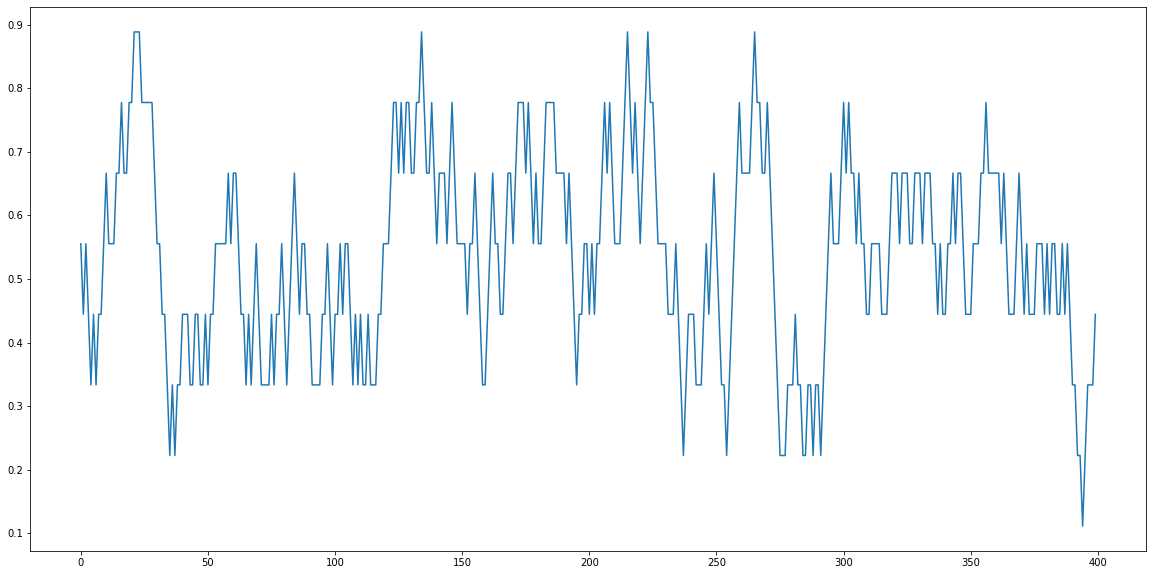

In [103]:
nrun = 400
T = 2.4
U = hot_start(9) 
M,U,HH = Thermalization(U,T,nrun, 0)
X = np.arange(0,len(M),1)
plt.figure(figsize = [20,10])
plt.plot(X,M,"-")
plt.show()

In [104]:
B

0.0

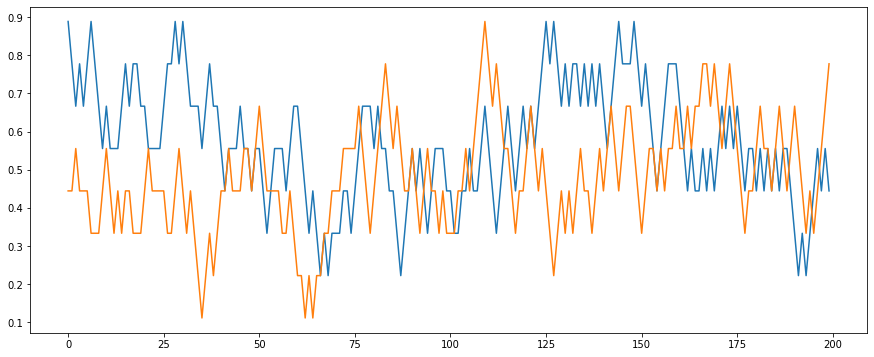

In [105]:
 
nrun = 200
T = 5.0
U1 = cold_start(9) 
U2 = hot_start(9)
M1,U1,HH = Thermalization(U1,T,nrun,0)
M2,U2,HH = Thermalization(U2,T,nrun,0)
X = np.arange(0,len(M1),1)
 
plt.figure(figsize = [15,6])
plt.plot(X,M1,"-")
plt.plot(X,M2,"-")
plt.show()

In [120]:
def fields(x):
    L = 9
    nrun = 2000
    Tn = 100
    avm = []
    stdh = []
    KT = []
    B=x
    for t in range(1,Tn+1):
            T = 0.1*t
            KT.append(T)
            U = cold_start(L)
            M,U,HH = Thermalization(U,T,nrun,0)
            nM = M[1500:nrun-1]
            nH = HH[1500:nrun-1]
            stdh.append(np.std(nH))
            avm.append(np.mean(nM))

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    axes[0].scatter(KT, avm,s=17)
    axes[0].title.set_text(  ('At B={}'.format(B)))
    axes[0].set_xlabel("Temperature",fontsize='20')
    axes[0].set_ylabel("Average magnetization",fontsize='20')

    axes[1].scatter(KT, stdh,s=17)
    axes[1].set_xlabel("Temperature",fontsize='20')
    axes[1].set_ylabel("Specific Heat Capacity",fontsize='20')

Streaming output truncated to the last 5000 lines.























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































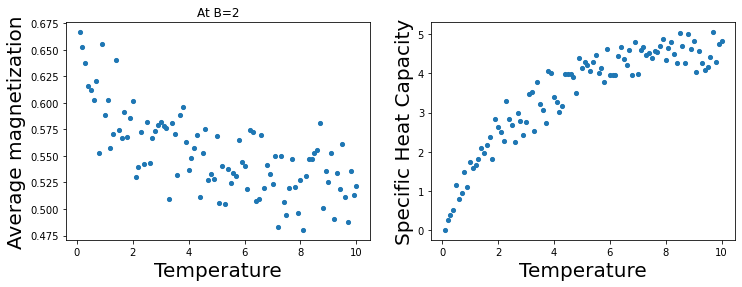

In [121]:
fields(2)

Streaming output truncated to the last 5000 lines.























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































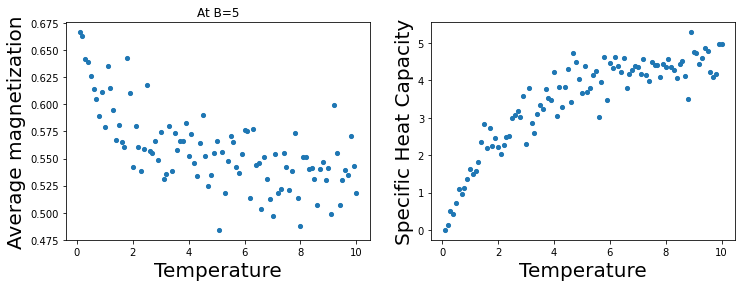

In [123]:
fields(5)

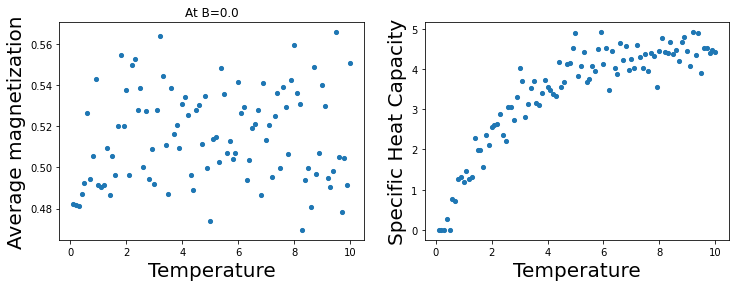

In [108]:
plotting(KT,avm,stdh)

Streaming output truncated to the last 5000 lines.























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































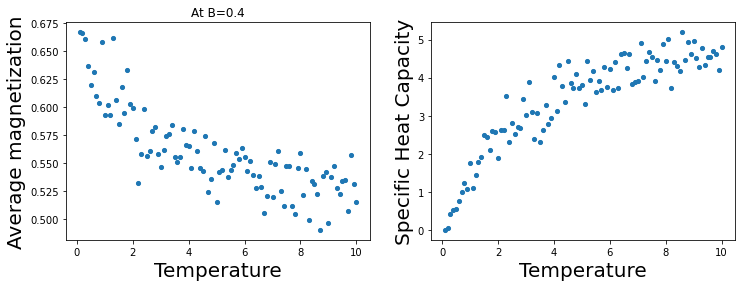

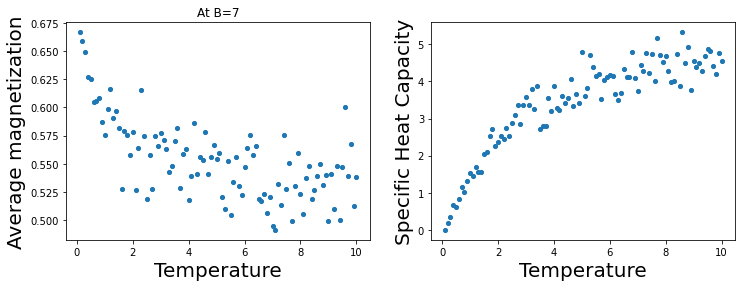

In [124]:
for g in [0.4,7]:
  fields(g)
    

Streaming output truncated to the last 5000 lines.























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































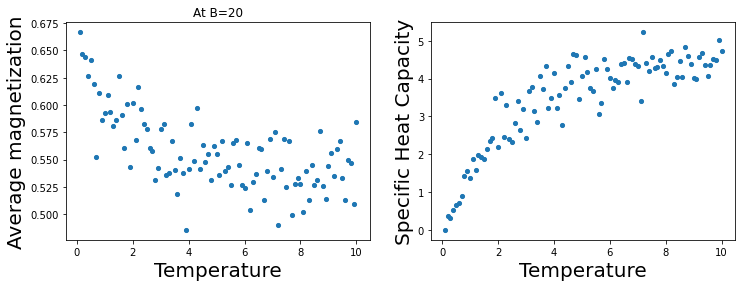

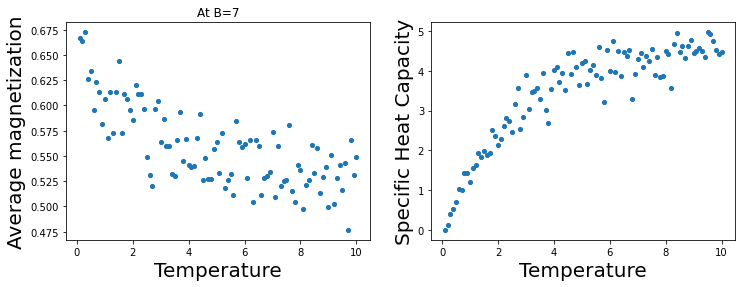

In [125]:
for g in [20,7]:
  fields(g)
    